In [1]:
import os

if not os.getcwd().endswith('Dissertation'):
    os.chdir('..')

In [2]:
import pandas as pd
import numpy as np
from glob import glob

q1_means = []
q2_means = []
q1_stds = []
q2_stds = []
for i in glob('Data\\test_csv\\*_results\\*'):
    data = pd.read_csv(i)
    q1_means.append(np.abs(np.mean(data['Q1_means']) - data['Q1_cutoff'].unique()[0]))
    q1_stds.append(np.mean(data['Q1_stds']))
    q2_means.append(np.abs(np.mean(data['Q2_means']) - data['Q2_cutoff'].unique()[0]))
    q2_stds.append(np.mean(data['Q2_stds']))

In [3]:
def put_into_bins(data_points, bins):
    bin_height = dict()
    for i in range(len(bins) - 1):
        bin_height[f'[{float(bins[i])}, {float(bins[i + 1])})'] = 0
    bin_height[f'>={float(bins[-1])}'] = 0
    for point in data_points:
        found = False
        for i in range(len(bins) - 1):
            if (point < bins[i + 1]) and (point >= bins[i]):
                bin_height[f'[{float(bins[i])}, {float(bins[i + 1])})'] += 1
                found = True
        if not found:
            bin_height[f'>={float(bins[-1])}'] += 1
    return bin_height

26
[0.0, 1.0): 0.7692307692307693
[1.0, 2.0): 0.11538461538461539
[2.0, 3.0): 0.0
>=3.0: 0.11538461538461539


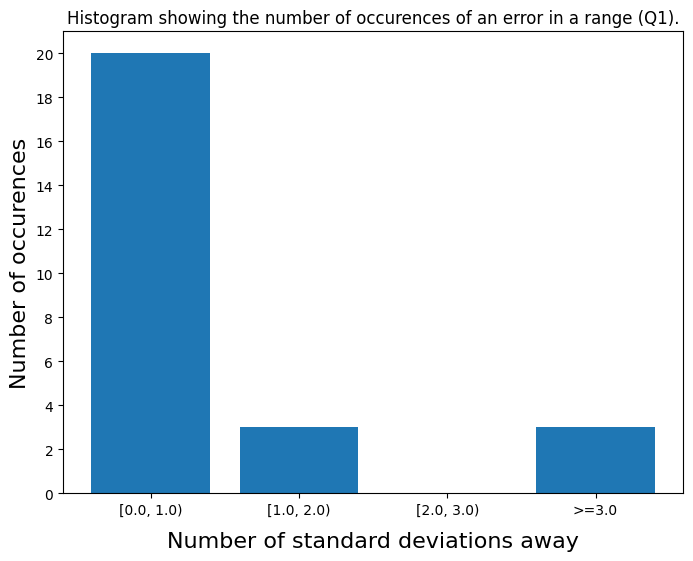

26
[0.0, 1.0): 0.6538461538461539
[1.0, 2.0): 0.3076923076923077
[2.0, 3.0): 0.0
>=3.0: 0.038461538461538464


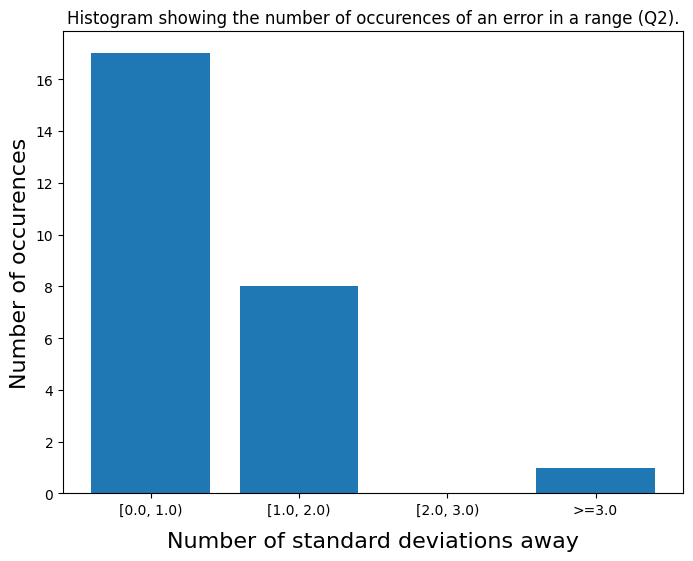

In [4]:
import matplotlib.pyplot as plt

for session, mean, std in [('Q1', q1_means, q1_stds), ('Q2', q2_means, q2_stds)]:
    bins = put_into_bins(np.floor_divide(mean, std), [0, 1, 2, 3])

    print(sum(bins.values()))
    for key, value in bins.items():
        print(f'{key}: {value / sum(bins.values())}')

    plt.figure(figsize=(8, 6), dpi=100)
    plt.xlabel('Number of standard deviations away', fontsize=16, labelpad=10)
    plt.ylabel('Number of occurences', fontsize=16)
    plt.yticks([0,2,4,6,8,10,12,14,16,18,20, 22])
    plt.title(f'Histogram showing the number of occurences of an error in a range ({session}).')
    plt.bar(bins.keys(), bins.values())
    plt.savefig(f'Data\\plots\\std_Error_Histogram_{session}.png')
    plt.show()